In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = sns.load_dataset('seaice')
df.head(10)

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594
5,1980-01-11,14.665
6,1980-01-13,14.771
7,1980-01-15,14.831
8,1980-01-17,14.957
9,1980-01-19,15.120


In [60]:
np.diff(df.Date)

array([172800000000000, 172800000000000, 172800000000000, ...,
        86400000000000,  86400000000000,  86400000000000],
      shape=(13174,), dtype='timedelta64[ns]')

In [61]:
df.tail(10)

,Date,Extent
13165,2019-12-22,12.327
13166,2019-12-23,12.436
13167,2019-12-24,12.494
13168,2019-12-25,12.545
13169,2019-12-26,12.638
13170,2019-12-27,12.721
13171,2019-12-28,12.712
13172,2019-12-29,12.780
13173,2019-12-30,12.858
13174,2019-12-31,12.889


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13175 non-null  datetime64[ns]
 1   Extent  13175 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 206.0 KB


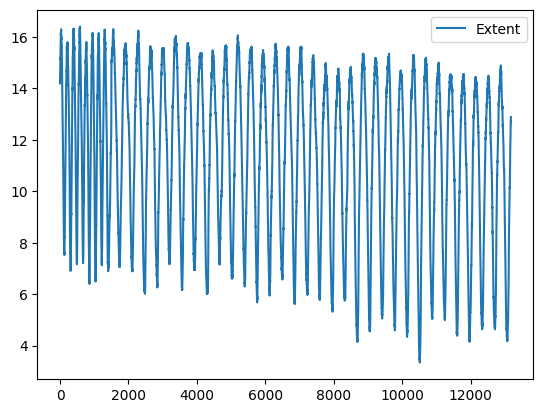

In [120]:
sns.lineplot(data=df)
plt.show()

In [63]:
diff_data = np.diff(df.Date)

In [64]:
np.unique(diff_data, return_counts=True)

(array([  86400000000000,  172800000000000, 3628800000000000],
       dtype='timedelta64[ns]'),
 array([11779,  1394,     1]))

In [65]:
diff_data.min()

np.timedelta64(86400000000000,'ns')

In [66]:
diff_data == 172800000000000

array([False, False, False, ...,  True,  True,  True], shape=(13174,))

In [69]:
df[np.append([172800000000000], diff_data) == 172800000000000]

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594
...,...,...
1390,1987-08-12,7.793
1391,1987-08-14,7.557
1392,1987-08-16,7.382
1393,1987-08-18,7.390


In [70]:
df_filtered = df[np.append([172800000000000], diff_data) == 172800000000000]
np.unique(np.diff(df_filtered.Date))

array([172800000000000], dtype='timedelta64[ns]')

In [71]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1395 non-null   datetime64[ns]
 1   Extent  1395 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.7 KB


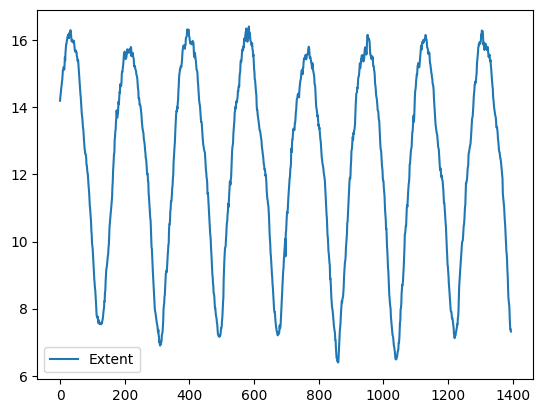

In [121]:
sns.lineplot(df_filtered)
plt.show()

## DFT manual calculation

In [73]:
N = len(df_filtered)

In [74]:
n = np.arange(0,N)

In [75]:
x = df_filtered.Extent.to_numpy()
x[:5]

array([14.2  , 14.302, 14.414, 14.518, 14.594])

In [76]:
exponent_arr_fn = lambda i : np.exp(-1j * i* 2*np.pi/N * n)

In [77]:
element_i = lambda i : np.dot(x, exponent_arr_fn(i))

In [78]:
ft = np.vectorize(element_i)

In [79]:
dft = ft(n)

In [80]:
dft

array([17163.241       +0.j        ,   176.37825205 -82.08536121j,
         207.78231138+129.49738882j, ...,   198.57023768 -59.93661052j,
         207.78231138-129.49738882j,   176.37825205 +82.08536121j],
      shape=(1395,))

In [81]:
def dft_efficient(x):
    N = len(x)
    n = np.arange(N)
    k_vector = np.arange(0, N).reshape((N,1))
    
    dft_x = np.dot(np.exp(-1j * 2*np.pi/N*k_vector*n), x)

    return dft_x

In [82]:
%timeit dft_efficient(df_filtered.Extent.to_numpy())

94.6 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
%timeit ft(n)

97.5 ms ± 901 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [85]:
df_filtered.head(5)

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594


In [86]:
df_filtered.iloc[1,0] - df_filtered.iloc[0, 0]

Timedelta('2 days 00:00:00')

In [106]:
sampling_rate = df_filtered.iloc[1,0] - df_filtered.iloc[0, 0]

In [107]:
sampling_rate.days

2

In [108]:
sampling_rate = 1/sampling_rate.days
frequencies = n/N * sampling_rate

In [91]:
dft_data = dft_efficient(df_filtered.Extent.to_numpy())

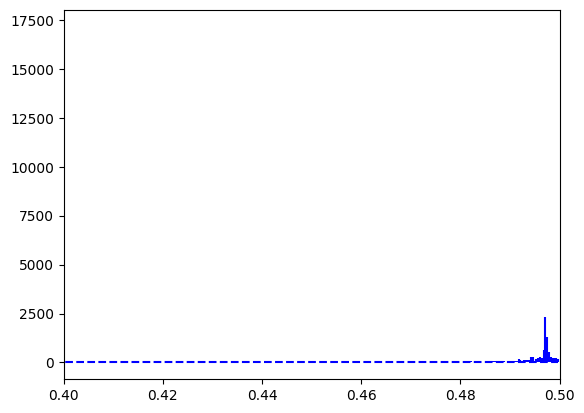

In [140]:
plt.stem(frequencies, abs(dft_data), 'b', markerfmt="", basefmt="--b")
plt.xlim(0.4, 0.5)
plt.show()

In [153]:
frequencies[-100:-1]

array([0.46415771, 0.46451613, 0.46487455, 0.46523297, 0.4655914 ,
       0.46594982, 0.46630824, 0.46666667, 0.46702509, 0.46738351,
       0.46774194, 0.46810036, 0.46845878, 0.4688172 , 0.46917563,
       0.46953405, 0.46989247, 0.4702509 , 0.47060932, 0.47096774,
       0.47132616, 0.47168459, 0.47204301, 0.47240143, 0.47275986,
       0.47311828, 0.4734767 , 0.47383513, 0.47419355, 0.47455197,
       0.47491039, 0.47526882, 0.47562724, 0.47598566, 0.47634409,
       0.47670251, 0.47706093, 0.47741935, 0.47777778, 0.4781362 ,
       0.47849462, 0.47885305, 0.47921147, 0.47956989, 0.47992832,
       0.48028674, 0.48064516, 0.48100358, 0.48136201, 0.48172043,
       0.48207885, 0.48243728, 0.4827957 , 0.48315412, 0.48351254,
       0.48387097, 0.48422939, 0.48458781, 0.48494624, 0.48530466,
       0.48566308, 0.48602151, 0.48637993, 0.48673835, 0.48709677,
       0.4874552 , 0.48781362, 0.48817204, 0.48853047, 0.48888889,
       0.48924731, 0.48960573, 0.48996416, 0.49032258, 0.49068

In [154]:
max_frequency = np.argmax(abs(dft_data[-100:-1]))
max_frequency

np.int64(92)

In [155]:
frequencies[-100:-1][max_frequency]

np.float64(0.4971326164874552)

In [156]:
first_harmonic = 1/frequencies[-100:-1][max_frequency]
first_harmonic

np.float64(2.0115356885364095)

In [136]:
first_harmonic = int(np.round(first_harmonic, 0))
first_harmonic

349

In [124]:
np.argsort(abs(dft_data[1:20]))

array([13, 18, 17, 16, 12,  0,  2, 11,  3,  1,  9, 14, 10,  4, 15,  5,  8,
        6,  7])

In [127]:
abs(dft_data[1:20][np.argsort(abs(dft_data[1:20]))])

array([  67.35485416,  103.42865232,  120.7014871 ,  146.47469891,
        170.63630764,  194.5438108 ,  207.41874691,  210.65918884,
        224.62583701,  244.83272378,  253.33744502,  257.81612821,
        258.82880186,  263.87395693,  274.26535949,  520.55190233,
        659.2514696 , 1307.07942187, 2310.06032068])

In [129]:
main_frequencies = frequencies[1:20][np.argsort(abs(dft_data[1:20]))]
main_frequencies

array([0.00501792, 0.00681004, 0.00645161, 0.00609319, 0.0046595 ,
       0.00035842, 0.00107527, 0.00430108, 0.00143369, 0.00071685,
       0.00358423, 0.00537634, 0.00394265, 0.00179211, 0.00573477,
       0.00215054, 0.00322581, 0.00250896, 0.00286738])

In [132]:
main_time_periods = np.round(1/main_frequencies).astype(int)
main_time_periods

array([ 199,  147,  155,  164,  215, 2790,  930,  232,  698, 1395,  279,
        186,  254,  558,  174,  465,  310,  399,  349])

# FFT Numpy

In [157]:
dft_fft = np.fft.rfft(df_filtered.Extent.to_numpy())

In [158]:
%timeit np.fft.rfft(df_filtered.Extent.to_numpy())

35 μs ± 258 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [160]:
dft_fft[:10]

array([17163.241        +0.j        ,   176.37825205  -82.08536121j,
         207.78231138 +129.49738882j,   198.57023768  +59.93661052j,
         180.87146302 +133.20015209j,   191.55467234 +181.48353272j,
         399.10163074 +334.20378717j,   883.22497656 +963.51972261j,
       -1469.92789122-1782.046767j  ,  -363.44898088 -550.01576202j])

In [162]:
fft_frequencies = np.arange(len(dft_fft))/len(dft_fft) * sampling_rate

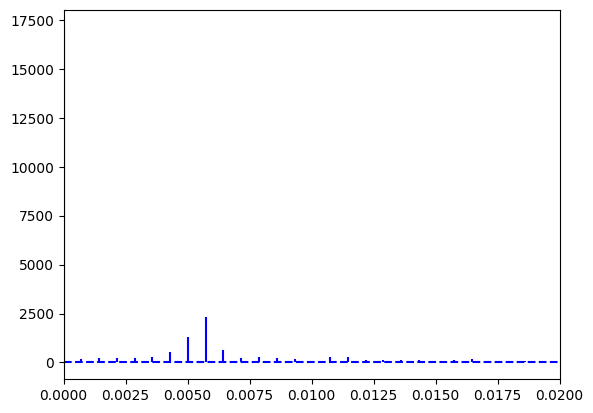

In [165]:
plt.stem(fft_frequencies, abs(dft_fft), 'b', markerfmt="", basefmt="--b")
plt.xlim(0., 0.02)
plt.show()

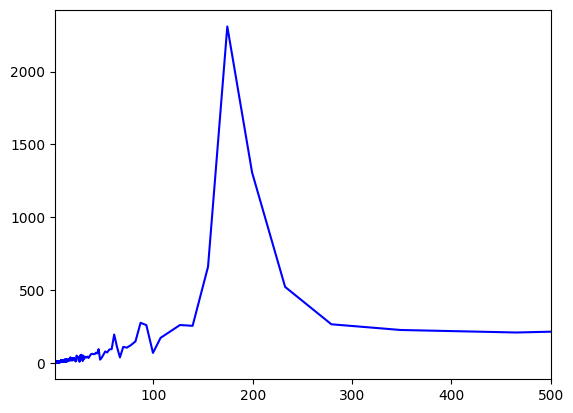

In [198]:
plt.plot(1/fft_frequencies[1:], abs(dft_fft)[1:], 'b')
plt.xlim(1, 500)
plt.show()

In [190]:
# per day
sampling_rate

0.5

In [167]:
np.max(abs(dft_data)[1:20])

np.float64(2310.0603206765163)

In [169]:
np.argmax(abs(dft_data)[1:20])

np.int64(7)

In [170]:
fft_frequencies[1:20][np.argmax(abs(dft_data)[1:20])]

np.float64(0.0057306590257879654)

In [171]:
1/fft_frequencies[1:20][np.argmax(abs(dft_data)[1:20])]

np.float64(174.5)

In [172]:
np.round(1/fft_frequencies[1:20][np.argmax(abs(dft_data)[1:20])])

np.float64(174.0)

# Remove seasonality

## Statsmodels

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [176]:
df_filtered.set_index('Date')

,Extent
Date,
1980-01-01,14.200
1980-01-03,14.302
1980-01-05,14.414
1980-01-07,14.518
1980-01-09,14.594
...,...
1987-08-12,7.793
1987-08-14,7.557
1987-08-16,7.382


### Additive

In [177]:
result = seasonal_decompose(df_filtered.set_index('Date'), model='additive')

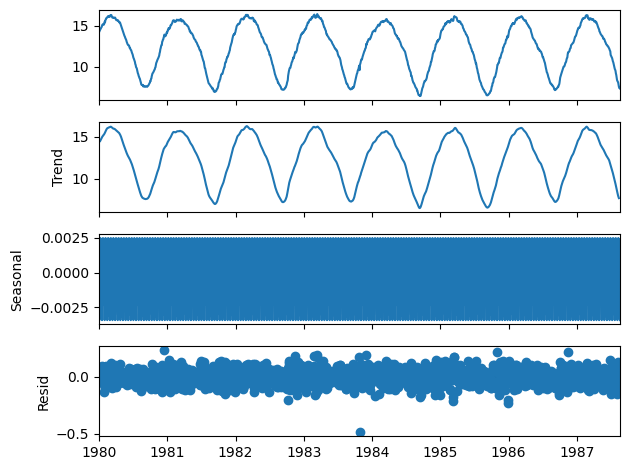

In [178]:
result.plot()
plt.show()

In [179]:
result.seasonal

Date
1980-01-01    0.001991
1980-01-03   -0.003435
1980-01-05   -0.003024
1980-01-07    0.002485
1980-01-09   -0.002304
                ...   
1987-08-12   -0.002304
1987-08-14    0.002452
1987-08-16    0.001835
1987-08-18    0.001991
1987-08-20   -0.003435
Name: seasonal, Length: 1395, dtype: float64

In [180]:
result.trend

Date
1980-01-01          NaN
1980-01-03          NaN
1980-01-05          NaN
1980-01-07    14.494857
1980-01-09    14.585000
                ...    
1987-08-12     7.800143
1987-08-14     7.668286
1987-08-16          NaN
1987-08-18          NaN
1987-08-20          NaN
Name: trend, Length: 1395, dtype: float64

In [181]:
result.trend.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1395 entries, 1980-01-01 to 1987-08-20
Series name: trend
Non-Null Count  Dtype  
--------------  -----  
1389 non-null   float64
dtypes: float64(1)
memory usage: 21.8 KB


In [182]:
result.weights

Date
1980-01-01    1.0
1980-01-03    1.0
1980-01-05    1.0
1980-01-07    1.0
1980-01-09    1.0
             ... 
1987-08-12    1.0
1987-08-14    1.0
1987-08-16    1.0
1987-08-18    1.0
1987-08-20    1.0
Name: weights, Length: 1395, dtype: float64

In [184]:
result.nobs

(1395,)

### Multiplicative

In [188]:
result_m = seasonal_decompose(df_filtered.set_index('Date'), model='multiplicative')

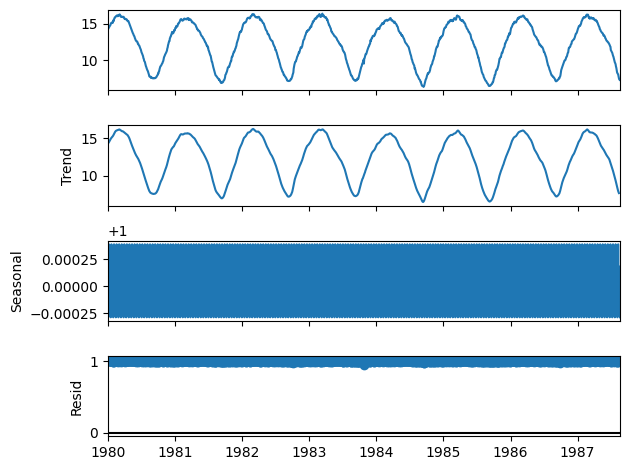

In [189]:
result_m.plot()
plt.show()

## Manual

In [200]:
from scipy.fft import fft, ifft, fftfreq

In [201]:
dft_sc_fft = fft(df_filtered.Extent.to_numpy())

In [226]:
sc_freq = fftfreq(len(df_filtered), d=2*86400)
sc_freq

array([ 0.00000000e+00,  4.14841365e-09,  8.29682729e-09, ...,
       -1.24452409e-08, -8.29682729e-09, -4.14841365e-09], shape=(1395,))

In [233]:
60*60*24

86400

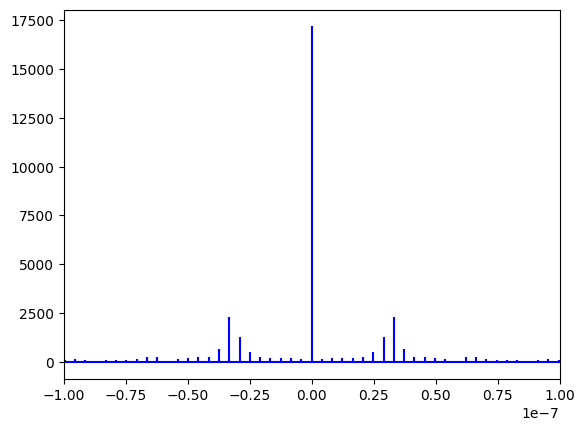

In [234]:
plt.stem(sc_freq, abs(dft_sc_fft), 'b', markerfmt=" ", basefmt='-b')
plt.xlim(-1*10**(-7),1*10**(-7))
plt.show()

In [235]:
# Get the one-sided specturm
n_oneside = len(dft_sc_fft)//2
n_oneside

697

In [236]:
# get the one side frequency
f_oneside = sc_freq[:n_oneside]

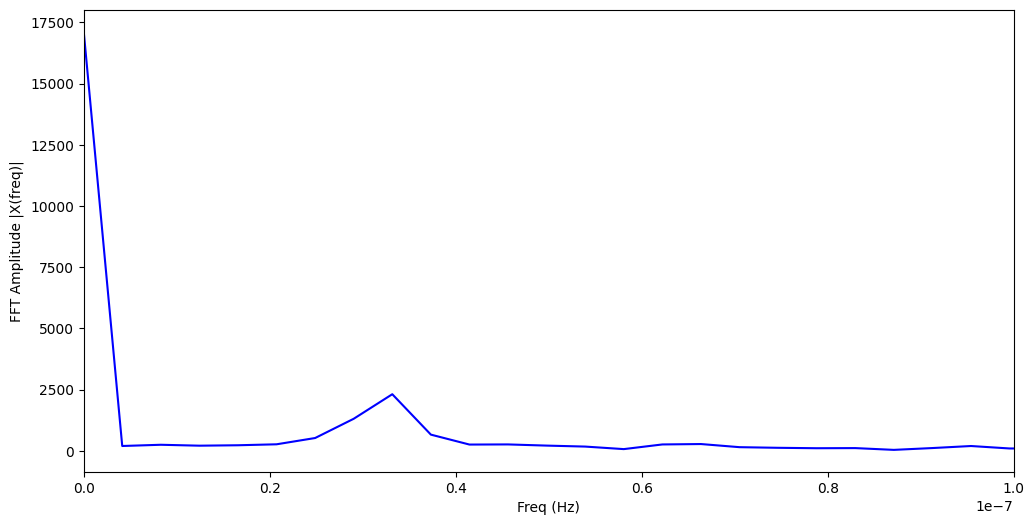

In [237]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(dft_sc_fft[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,1*10**(-7))
plt.show()

/tmp/ipykernel_1442726/1914611519.py:1: RuntimeWarning: divide by zero encountered in divide
  t_day = 1/f_oneside / (86400*2)


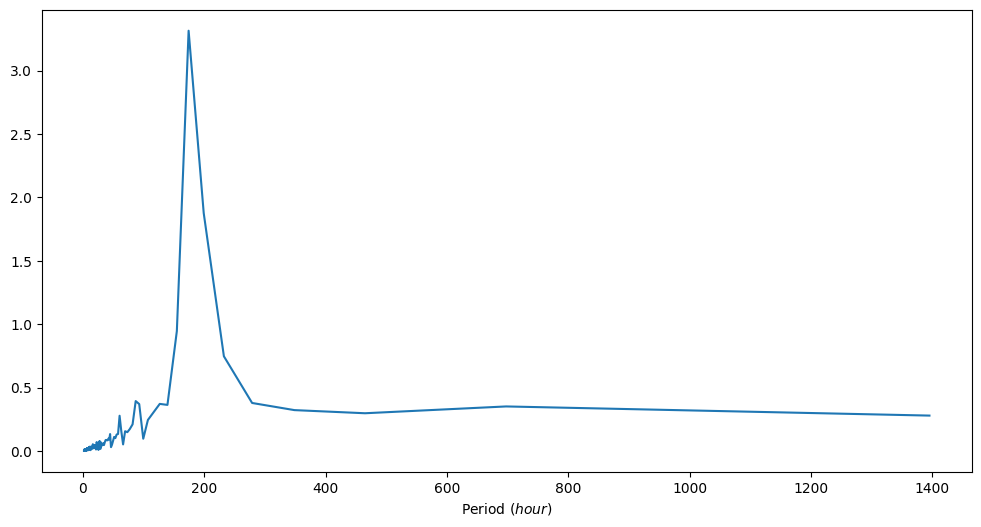

In [239]:
t_day = 1/f_oneside / (86400*2)
plt.figure(figsize=(12,6))
plt.plot(t_day, np.abs(dft_sc_fft[:n_oneside])/n_oneside)
# plt.xticks([12, 24, 84, 168])
# plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.show()

In [256]:
dft_sc_fft_filtered =dft_sc_fft.copy()

In [257]:
np.argmax(np.abs(dft_sc_fft[1:n_oneside]))

np.int64(7)

In [258]:
1/f_oneside[8]/(2*86400)

np.float64(174.375)

In [259]:
cutoff= 1/f_oneside[8]/(2*86400) # days

In [260]:
f_oneside[8]

np.float64(3.3187309172972255e-08)

In [249]:
sc_freq[abs(sc_freq) == f_oneside[8]]

array([ 3.31873092e-08, -3.31873092e-08])

In [261]:
dft_sc_fft_filtered[abs(sc_freq) > f_oneside[8]] = 0

In [262]:
filtered = ifft(dft_sc_fft_filtered)

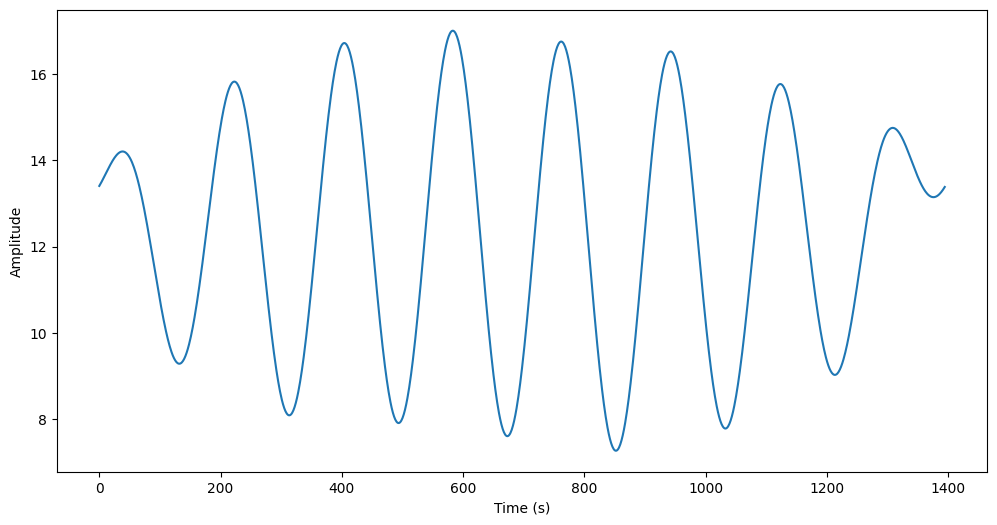

In [263]:
plt.figure(figsize = (12, 6))
plt.plot(filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

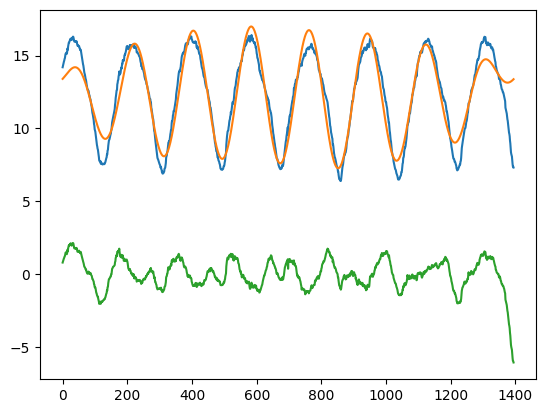

In [265]:
plt.plot(df_filtered.Extent.to_numpy())
plt.plot(filtered)
plt.plot(df_filtered.Extent.to_numpy() - np.real(filtered))
plt.show()